In [2]:
import matplotlib.pyplot as plt
import numpy as np
import shelve
import h5py

In [13]:
#filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/pzinput/pz_input_gold_DES1201-4040.h5'
#tiledata =  h5py.File(filename)  

In [35]:
filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_sg_DES1201-4040_finer.h5'
with h5py.File(filename) as f:
    data1={}
    for key in list(f.keys()):
            data1[key] = np.array(f[key])

In [36]:
filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_sg_DES1155-3749_finer.h5'
with h5py.File(filename) as f:
    data2={}
    for key in list(f.keys()):
            data2[key] = np.array(f[key])

In [39]:
filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_gold_DES1155-3749_finer.h5'
with h5py.File(filename) as f:
    data_old={}
    for key in list(f.keys()):
            data_old[key] = np.array(f[key])

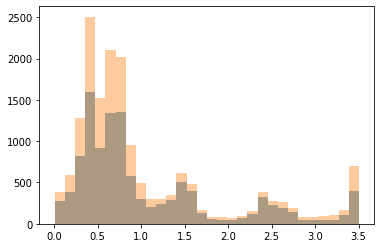

In [51]:
#plt.hist(data1['Z_ML'], bins=30, alpha=.6)
plt.hist(data2['Z_ML'], bins=30, alpha=.6)
plt.hist(data_old['Z_ML'], bins=30, alpha=.4)
plt.show()

In [34]:
data1

{'CHI_SQ': array([5.6326156e+00, 2.2284986e-02, 3.4846451e+00, ..., 7.0797324e+00,
        6.2590793e-02, 2.2346785e-03], dtype=float32),
 'ID': array([6852323270, 6852323290, 6852323448, ..., 6852355181, 6852355226,
        6852355269]),
 'M_0': array([20.019264, 24.681267, 22.996815, ..., 18.928566, 24.184452,
        26.319412], dtype=float32),
 'ODDS': array([0.6514149 , 0.08291942, 1.        , ..., 0.99476206, 0.6191614 ,
        0.19175392], dtype=float32),
 'T_B': array([4., 6., 1., ..., 3., 1., 2.], dtype=float32),
 'T_ML': array([4., 6., 1., ..., 3., 1., 1.], dtype=float32),
 'Z_B': array([0.305, 0.395, 0.735, ..., 0.095, 0.645, 0.835], dtype=float32),
 'Z_B_MAX': array([0.36988786, 2.235     , 0.82126856, ..., 0.14944614, 0.805     ,
        1.525     ], dtype=float32),
 'Z_B_MIN': array([0.085     , 0.3256371 , 0.64873147, ..., 0.04055386, 0.5632065 ,
        0.545     ], dtype=float32),
 'Z_ML': array([0.305, 0.385, 0.735, ..., 0.095, 0.625, 0.635], dtype=float32)}

In [24]:
list(tiledata['df/block1_items'])

[b'MAG_AUTO_G',
 b'MAG_AUTO_R',
 b'MAG_AUTO_I',
 b'MAG_AUTO_Z',
 b'MAGERR_AUTO_G',
 b'MAGERR_AUTO_R',
 b'MAGERR_AUTO_I',
 b'MAGERR_AUTO_Z']

In [43]:
path = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/PZ_OUTPUT_sg_probs_DES1201-4040_finer'
probs = shelve.open(path)

In [44]:
zs2d = np.arange(0, 3.7, 0.2)

0.0 < z < 0.2


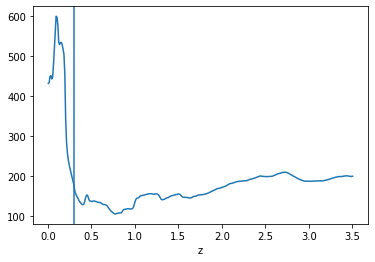

0.2 < z < 0.4


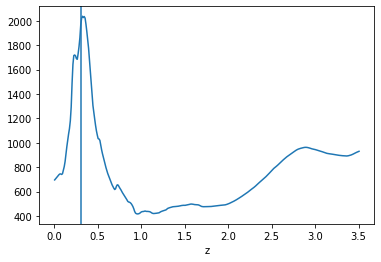

0.4 < z < 0.6000000000000001


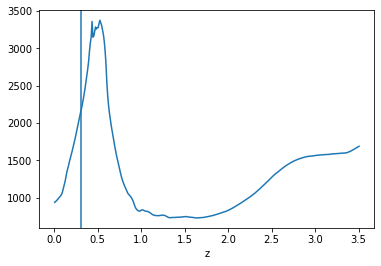

0.6000000000000001 < z < 0.8


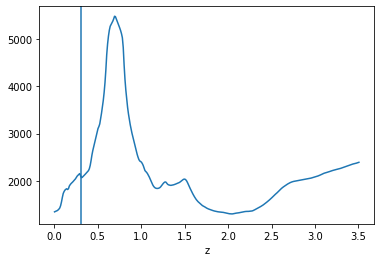

0.8 < z < 1.0


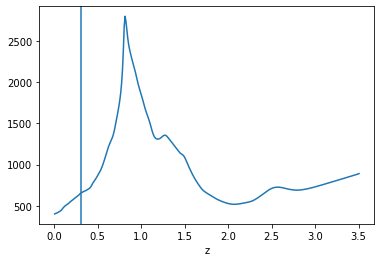

1.0 < z < 1.2000000000000002


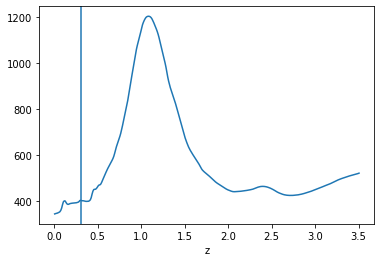

1.2000000000000002 < z < 1.4000000000000001


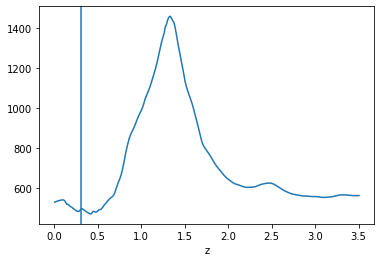

1.4000000000000001 < z < 1.6


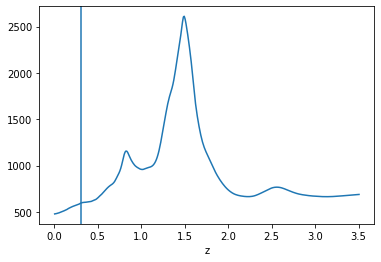

1.6 < z < 1.8


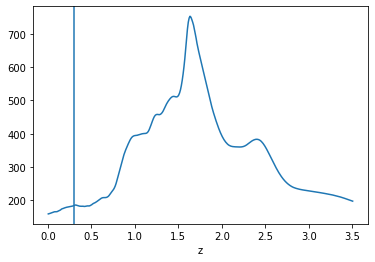

1.8 < z < 2.0


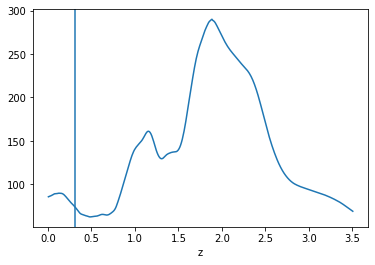

2.0 < z < 2.2


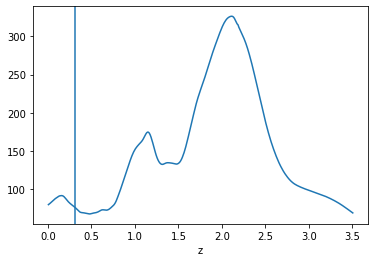

2.2 < z < 2.4000000000000004


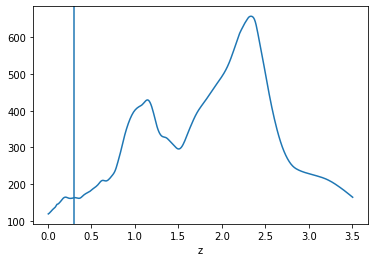

2.4000000000000004 < z < 2.6


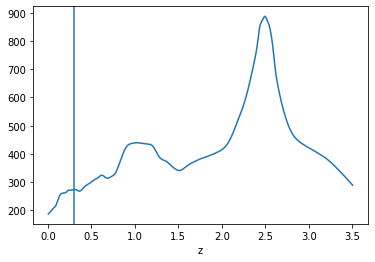

2.6 < z < 2.8000000000000003


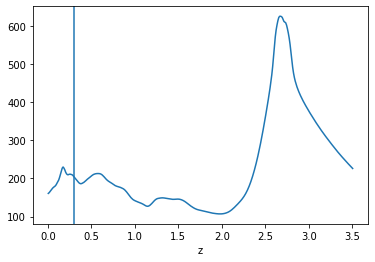

2.8000000000000003 < z < 3.0


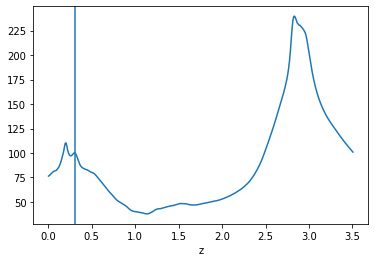

3.0 < z < 3.2


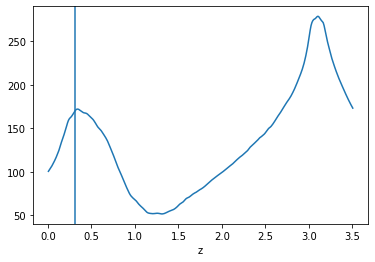

3.2 < z < 3.4000000000000004


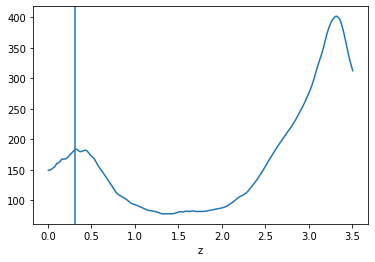

3.4000000000000004 < z < 3.6


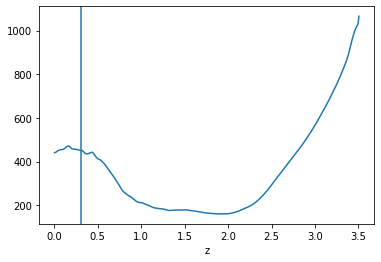

In [49]:
for i in range(len(zs2d)):
    if i<=17:
        zlo, zhi= zs2d[i], zs2d[i+1]
    else: break
    mask = np.logical_and(data1['Z_ML']>zlo, data1['Z_ML']<zhi)

    IDs = np.array(probs)[2:][mask]

    t_mls = data1['T_ML'][mask].astype('int')-1
    full_pdf = 0
    for i, ID in enumerate(IDs):
        z = probs[ID][0]
        pdf = probs[ID][2][:,t_mls[i]]
        full_pdf+=pdf
    
    print(f'{zlo} < z < {zhi}')
    plt.xlabel('z')
    plt.plot(z, full_pdf)
    plt.axvline(0.305)
    plt.show()

In [83]:
x = probs['6852323278']

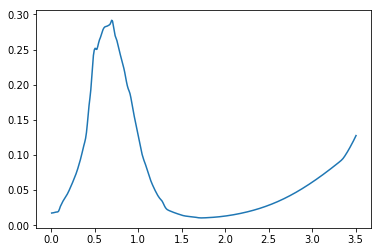

In [70]:
plt.plot(x[0], x[2][:,data['T_ML'][0].astype('int')-1])

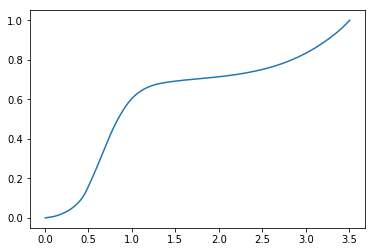

In [71]:
plt.plot(z, np.cumsum(x[2][:,data['T_ML'][0].astype('int')-1])/np.sum(x[2][:,data['T_ML'][0].astype('int')-1]))

In [72]:
from scipy.interpolate import interp1d
cdf = np.cumsum(x[2][:,data['T_ML'][0].astype('int')-1])/np.sum(x[2][:,data['T_ML'][0].astype('int')-1])
z = z
ITS = interp1d(cdf, z, kind='cubic')

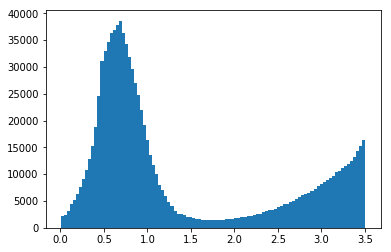

In [80]:
its_test = []
for i in range(1000000):
    its_test.append(ITS(np.random.uniform(cdf[0], 1)))

a = plt.hist(its_test, bins=100)

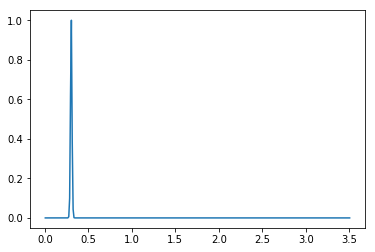

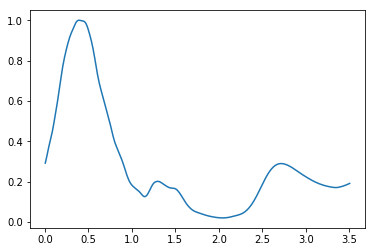

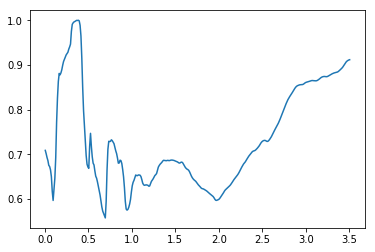

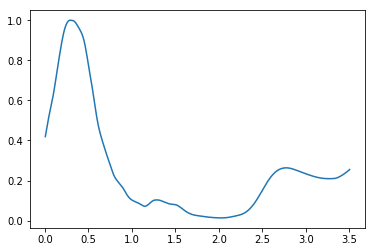

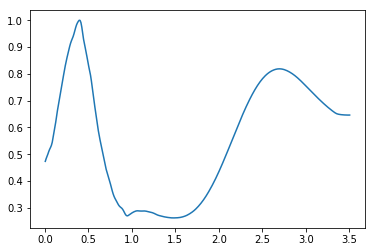

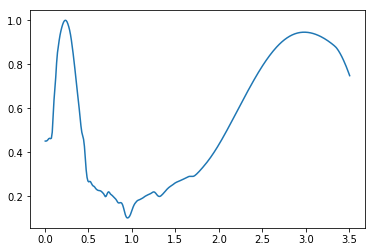

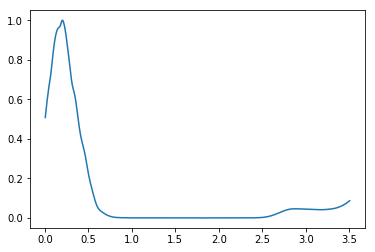

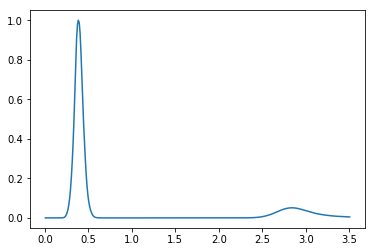

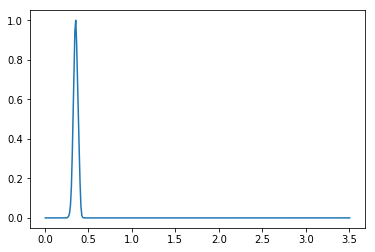

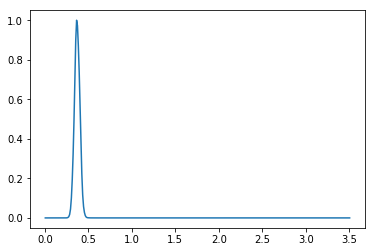

In [13]:
zlo, zhi= 0.2, 0.4
mask = np.logical_and(data['Z_ML']>zlo, data['Z_ML']<zhi)

IDs = np.array(probs)[2:][mask]

t_mls = data['T_ML'][mask].astype('int')-1
full_pdf = 0
for i, ID in enumerate(IDs[:10]):
    z = probs[ID][0]
    pdf = probs[ID][2][:,t_mls[i]]
    plt.plot(z, pdf)
    plt.show()

In [87]:
c = 0
for i, ID in enumerate(IDs):
    z = probs[ID][0]
    pdf = probs[ID][2][:,t_mls[i]]
    cdf = np.cumsum(pdf)
    if np.any(cdf[1:] <= cdf[:-1]): c+=1
        
print(c/IDs.size)

0.13146233382570163


0.35
0.6
0.85
0.88
0.91
0.94
0.97
1.0


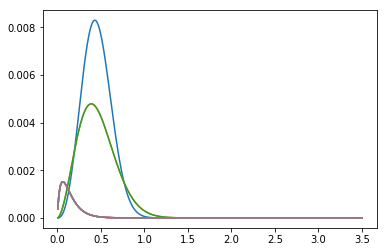

In [18]:
c=0
for i in range(8):
    c+=np.sum(x[1][:,i])
    print(c)
    plt.plot(x[0], x[1][:,i])
plt.show()

indexes 1 and 2, indexes 3-7 are the same. Index 0 is its own.

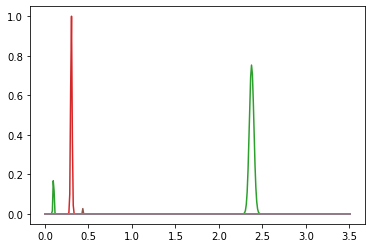

In [13]:
plt.plot(x[0], x[2])

In [68]:
pdf = x[2][:,int(bpzs['T_ML'][0])-1]

In [75]:
mlpz = np.array(bpzs['Z_ML'])

(array([ 410.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1019.]),
 array([0.205     , 0.215     , 0.225     , 0.235     , 0.245     ,
        0.255     , 0.26500002, 0.275     , 0.285     , 0.29500002,
        0.305     ], dtype=float32),
 <a list of 10 Patch objects>)

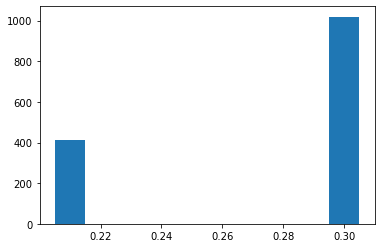

In [76]:
plt.hist(mlpz[np.logical_and(mlpz>.2, mlpz<.4)])

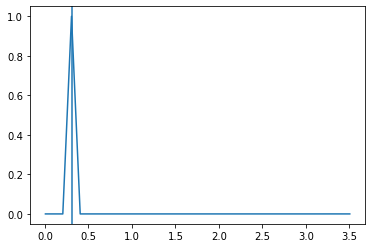

In [96]:
plt.plot(x[0], pdf)
plt.axvline(0.305)

In [ ]:
for i in range(8):
    print(i)
    print(y[:,i])

In [ ]:
plt.plot(x, y)
plt.xlabel('redshift')
plt.ylabel('probability')
plt.show()
for i in range(8):
    print(y[:,i]), print(np.sum(y[:,i]))
    plt.plot(x, y[:,i])
    plt.xlabel('redshift')
    plt.ylabel('probability')
    plt.show()

In [60]:
import glob
import pandas as pd

      wavelength           SED
0           91.0  0.000000e+00
1           94.0  0.000000e+00
2           96.0  0.000000e+00
3           98.0  0.000000e+00
4          100.0  0.000000e+00
...          ...           ...
6895    800000.0  4.124000e-08
6896   1000000.0  1.679000e-08
6897   1200000.0  8.049000e-09
6898   1400000.0  4.322000e-09
6899   1600000.0  2.521000e-09

[6900 rows x 2 columns]
ssp_25Myr_z008


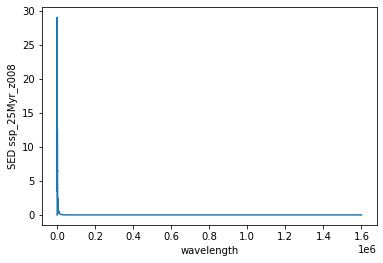

      wavelength           SED
0           91.0  1.998000e+00
1           94.0  2.107000e+00
2           96.0  2.163000e+00
3           98.0  2.861000e+00
4          100.0  4.261000e+00
...          ...           ...
6895    800000.0  6.607000e-09
6896   1000000.0  2.686000e-09
6897   1200000.0  1.287000e-09
6898   1400000.0  6.907000e-10
6899   1600000.0  4.029000e-10

[6900 rows x 2 columns]
ssp_5Myr_z008


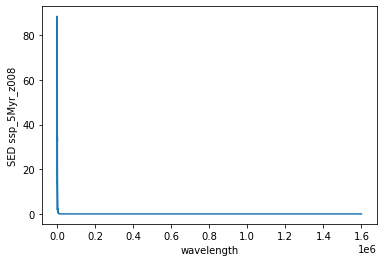

In [88]:
filepaths = glob.glob('/home/raulteixeira/photoz/code/software/DESC_BPZ/SED/*008.sed')
for i, filepath in enumerate(filepaths):
    with open(filepath, encoding='utf8') as f:
        lines = f.read()
        f.close()

    data=pd.read_csv(filepath, skiprows=6, names=['wavelength', 'SED'], delim_whitespace=True)
    print(data)
    name = filepath.split('.sed')[-2].split('/')[-1]
    print(name)
    plt.xlabel('wavelength')
    plt.ylabel(f'SED {name}')
    plt.plot(data['wavelength'], data['SED'])
    plt.show()